In [1]:
library(dplyr)
library(MatrixGenerics)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCum

In [2]:
colData <- readRDS("testis-colData.rds")
scale.data <- readRDS("testis-scale.data.rds")

In [3]:
write(deparse(levels(colData$ident)), stdout())

c("spermatogonium", "mid-late proliferating spermatogonia", "spermatogonium-spermatocyte transition", 
"spermatocyte 0", "spermatocyte 1", "spermatocyte 2", "spermatocyte 3", 
"spermatocyte 4", "spermatocyte 5", "spermatocyte 6", "spermatocyte 7a", 
"late primary spermatocyte", "early elongation stage spermatid", 
"early-mid elongation-stage spermatid", "mid-late elongation-stage spermatid", 
"cyst stem cell", "early cyst cell 1", "early cyst cell 2", "spermatocyte cyst cell branch a", 
"spermatocyte cyst cell branch b", "cyst cell branch a", "cyst cell branch b", 
"late cyst cell branch a", "late cyst cell branch b", "adult fat body", 
"muscle cell", "adult tracheal cell", "cyst cell intermediate", 
"head cyst cell", "hemocyte", "male gonad associated epithelium", 
"pigment cell", "secretory cell of the male reproductive tract", 
"spermatid", "spermatocyte", "unknown")


In [4]:
S2 <- read.csv("testis-spca-input-2000.csv.gz", check.names=F)

In [5]:
cl <- c("spermatogonium", "mid-late proliferating spermatogonia", "spermatogonium-spermatocyte transition", 
"spermatocyte 0", "spermatocyte 1", "spermatocyte 2", # "spermatocyte 3", 
# "spermatocyte 4", # "spermatocyte 5", # "spermatocyte 6", # "spermatocyte 7a", 
# "late primary spermatocyte", # "early elongation stage spermatid", 
# "early-mid elongation-stage spermatid", "mid-late elongation-stage spermatid", 
"cyst stem cell", "early cyst cell 1", "early cyst cell 2", "spermatocyte cyst cell branch a", 
"spermatocyte cyst cell branch b", "cyst cell branch a", "cyst cell branch b"
# "cyst cell intermediate"
# "late cyst cell branch a", "late cyst cell branch b",
# "adult fat body"
# "muscle cell", "adult tracheal cell", "cyst cell intermediate", 
# "head cyst cell", "hemocyte", "male gonad associated epithelium", 
# "pigment cell", "secretory cell of the male reproductive tract", 
# "spermatid"
)
genes <- c("nos", "stg", "lncRNA:Hsromega", "tj")
stopifnot(all(!is.na(match(genes, colnames(S2)))))
cells <- subset(colData, batch %in% c("sample0", "sample1", "sample2") & ident %in% cl)$rowname
ssquared <- rowVars(
  scale.data[genes, cells]
)
data.frame(
  genes,
  actual = S2[
    cbind(match(genes, colnames(S2)), match(genes, colnames(S2)))
  ],
  ssquared, uncorrected = ssquared * (length(cells) - 1) / length(cells)
)

genes,actual,ssquared,uncorrected
<chr>,<dbl>,<dbl>,<dbl>
nos,4.4895383,4.6513127,4.6501710
stg,5.4020806,4.6475038,4.6463630
lncRNA:Hsromega,0.7242932,0.6560225,0.6558615
tj,6.5196291,5.4124171,5.4110886


In [114]:
pcs <- as.matrix(read.csv("~/Fly-Cell-Atlas-GLM/testis-spca-result.csv", check.names=F))
pcs <- pcs * (apply(pcs, 1, \(v) median(sign(subset(v, v != 0)))) %>% replace(. == 0, 1))
pcs[6,, drop=T] %>% subset(. != 0)

rdo        CG42673       Atpalpha lncRNA:CR46148           Df31 
    -0.3234637     -0.2970956     -0.2898935      0.2982496      0.3114715 
lncRNA:CR44560           hoip            klu            srl  asRNA:CR43614 
     0.3258077      0.3009126      0.3498066      0.3195463      0.3404796

In [94]:
pcs[11,, drop=T] %>% subset(. != 0) %>% names() %>% deparse() %>% write(stdout())

c("side-V", "Oatp74D", "dally", "Esp", "CG8034", "comm3", "AdamTS-B", 
"santa-maria", "CG4476", "emc")


In [174]:
pcs[4,, drop=T] %>% subset(. != 0) %>% sort(dec=T) %>% names() %>% deparse() %>% write(stdout())

c("metro", "jigr1", "Ilp6", "pain", "Sema5c", "CG34347", "CG42524", 
"vn", "CG7692", "zpg")


In [158]:
pcs[, "Pde9"]

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.2830186

In [39]:
pcs[, "piwi"]

[1] 0.0000000 0.3002476 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000

In [7]:
library(dplyr)
library(Matrix)
library(Seurat)
library(tibble)
library(withr)
stem <- CreateSeuratObject(
  readRDS("testis-counts.rds"),
  meta.data = column_to_rownames(readRDS("testis-colData.rds"))
)

Attaching SeuratObject



In [8]:
stem[["RNA"]]@meta.features <- read.csv("dmel-all-r6.31-rowData.csv") %>%
  column_to_rownames()

In [9]:
stem <- stem %>% subset(cell = cells)
dim(stem)

[1] 17825  4074

In [10]:
integrated <- readRDS("testis-integrated.rds")

In [16]:
stem$batch <- stem$batch %>%
  factor(c("sample1", "sample2", "sample3")) %>%
  `contrasts<-`(value = contr.sum(3))
Idents(stem) <- droplevels(stem$ident)

stem[["integrated"]] <- subset(integrated, cells = Cells(stem))
DefaultAssay(stem) <- "integrated"

In [17]:
stem[["integrated"]]@scale.data <- scale.data[, Cells(stem)]

In [67]:
stem[["spca"]] <- CreateDimReducObject(
  crossprod(
    stem[["integrated"]]@scale.data[colnames(pcs), ],
    matrix(
      t(pcs),
      nrow = ncol(pcs),
      dimnames = list(
        NULL,
        paste0("FEATURE_", seq(nrow(pcs)))
      )
    )
  ),
  assay = "integrated"
)

In [68]:
stem <- stem %>% RunUMAP(reduction = "spca", dims = 1:14, verbose = FALSE)

A: SPC1 vs eya: explains the cysts of spermatocytes

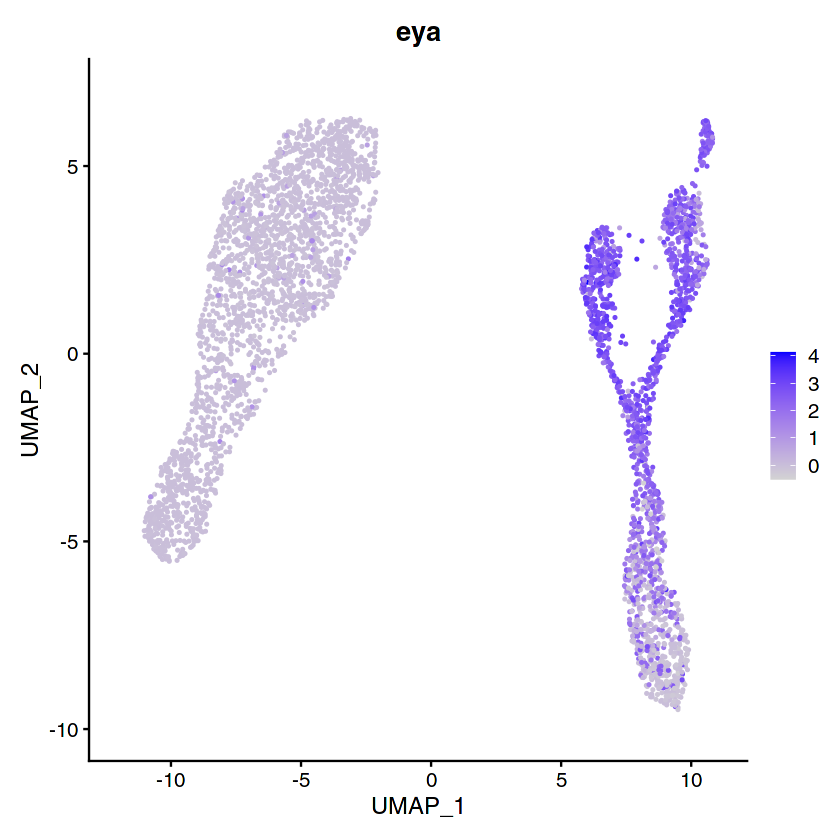

In [ ]:
FeaturePlot(stem, "eya") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

In [108]:
cor(stem[["spca"]]@cell.embeddings, pull(FetchData(stem, "eya")))

FEATURE_1,0.8749597
FEATURE_2,0.2415533
FEATURE_3,-0.3349143
FEATURE_4,0.6351387
FEATURE_5,0.8667799
FEATURE_6,-0.7458558
FEATURE_7,0.1163678
FEATURE_8,0.6763752
FEATURE_9,0.7991497
FEATURE_10,0.5815794
FEATURE_11,0.7592361


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


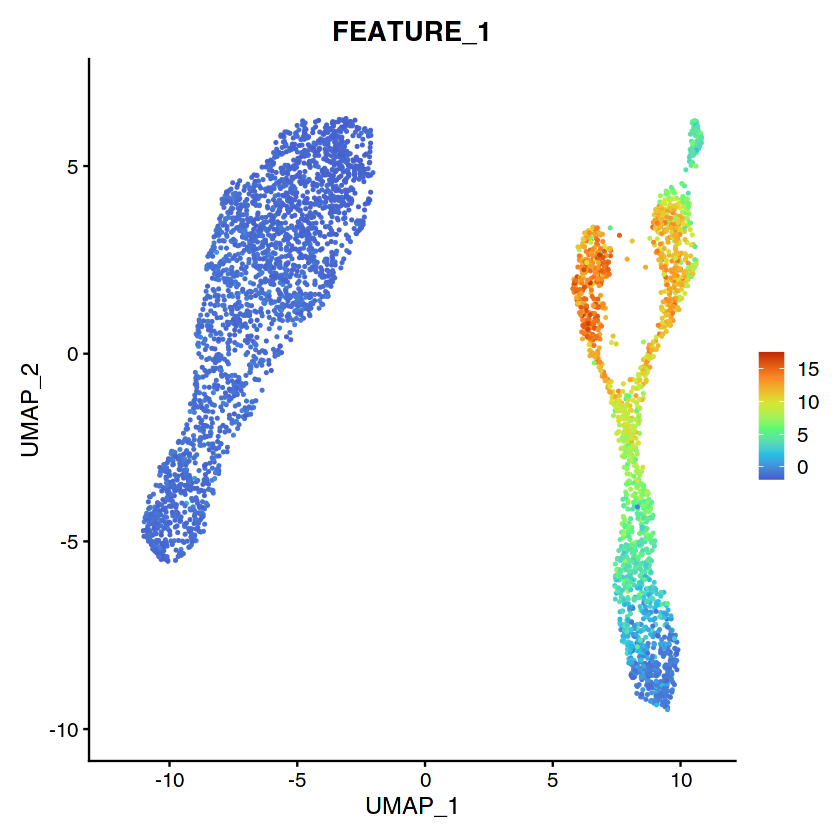

In [198]:
FeaturePlot(stem, "FEATURE_1") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

In [69]:
cor(stem[["spca"]]@cell.embeddings, pull(FetchData(stem, "UMAP_1")) > 2)

FEATURE_1,0.7816049
FEATURE_2,0.6968450
FEATURE_3,-0.4104520
FEATURE_4,0.9421876
FEATURE_5,0.7586924
FEATURE_6,-0.9071094
FEATURE_7,0.5767673
FEATURE_8,0.8086694
FEATURE_9,0.6860283
FEATURE_10,0.9090313
FEATURE_11,0.7432177


SPC4: Explains the cyst stem cell and progenitors (it is negatively correlated with SPC1 within the somatic compartment)

In [179]:
cor(stem[["spca"]]@cell.embeddings[, c(1, 4)] %>% subset(pull(FetchData(stem, "UMAP_1")) >= 2))

,FEATURE_1,FEATURE_4
FEATURE_1,1.0000000,-0.4257338
FEATURE_4,-0.4257338,1.0000000


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


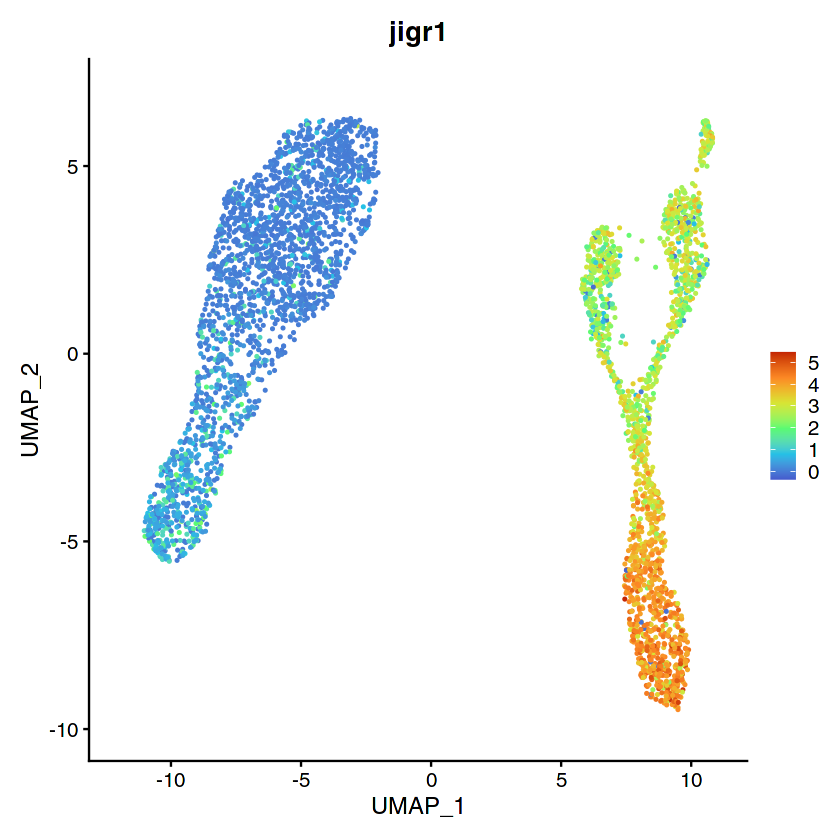

In [176]:
FeaturePlot(stem, "jigr1") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


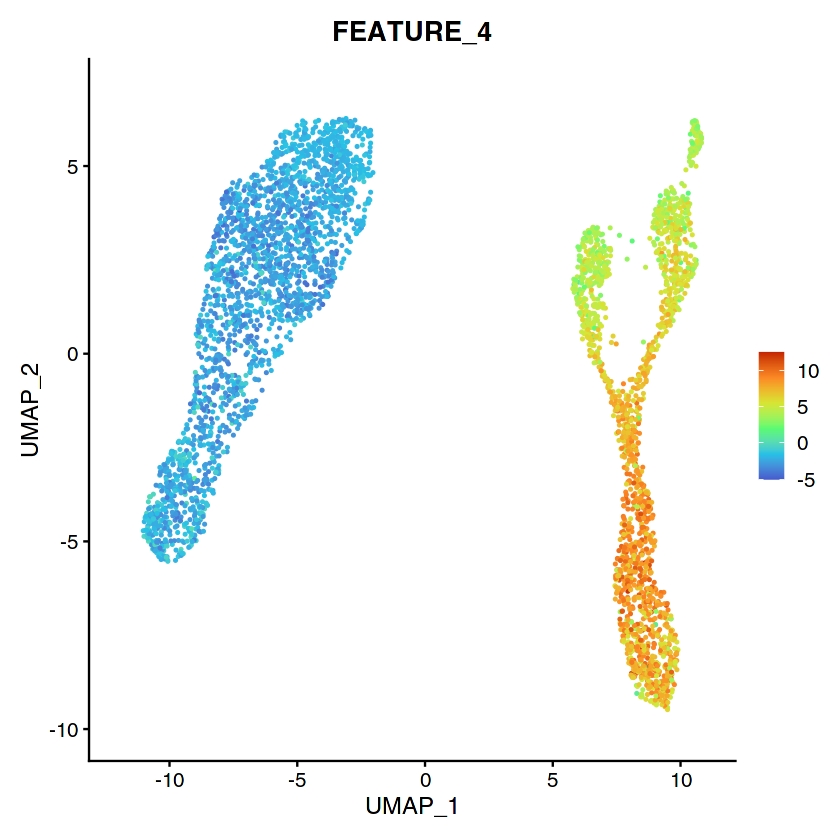

In [177]:
FeaturePlot(stem, "FEATURE_4") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

SPC6: Germline marker

In [140]:
cor(stem[["spca"]]@cell.embeddings, pull(FetchData(stem, "blanks")))

FEATURE_1,-0.35038361
FEATURE_2,-0.33990950
FEATURE_3,-0.03938387
FEATURE_4,-0.41355266
FEATURE_5,-0.34173892
FEATURE_6,0.27808343
FEATURE_7,-0.27712740
FEATURE_8,-0.39113015
FEATURE_9,-0.32234612
FEATURE_10,-0.44252529
FEATURE_11,-0.34388439


In [190]:
as_tibble(t(stem[["integrated"]]@scale.data)) %>%
  group_by(pull(FetchData(stem, "UMAP_1")) >= 2) %>%
  summarise_all(\(v) mean(v >= 0.5)) %>%
  `colnames<-`(value = colnames(.) %>% replace(1, "isSomatic")) %>%
  column_to_rownames("isSomatic") %>%
  t() %>%
  as.data.frame() %>%
  subset(pull(., 1) >= 0.6 & pull(., 2) < 0.2)

,FALSE,TRUE
,<dbl>,<dbl>
Myo81F,0.9336226,0.027699265
CG7692,0.9713666,0.046919163
Ppr-Y,0.6997831,0.043527417
sr,0.6798265,0.000000000
Rbp9,0.6108460,0.048615037
CG44774,0.9023861,0.013566987
lncRNA:CR46148,0.9292842,0.067269644
bru1,0.9553145,0.015262860
Df31,0.6416486,0.149802148


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


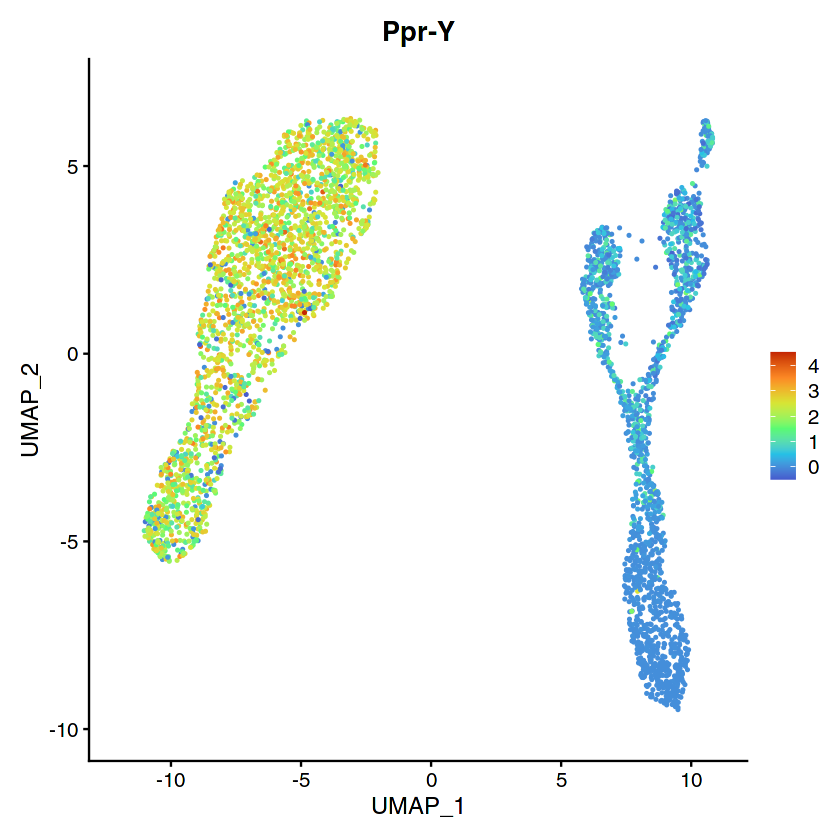

In [193]:
FeaturePlot(stem, "Ppr-Y") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


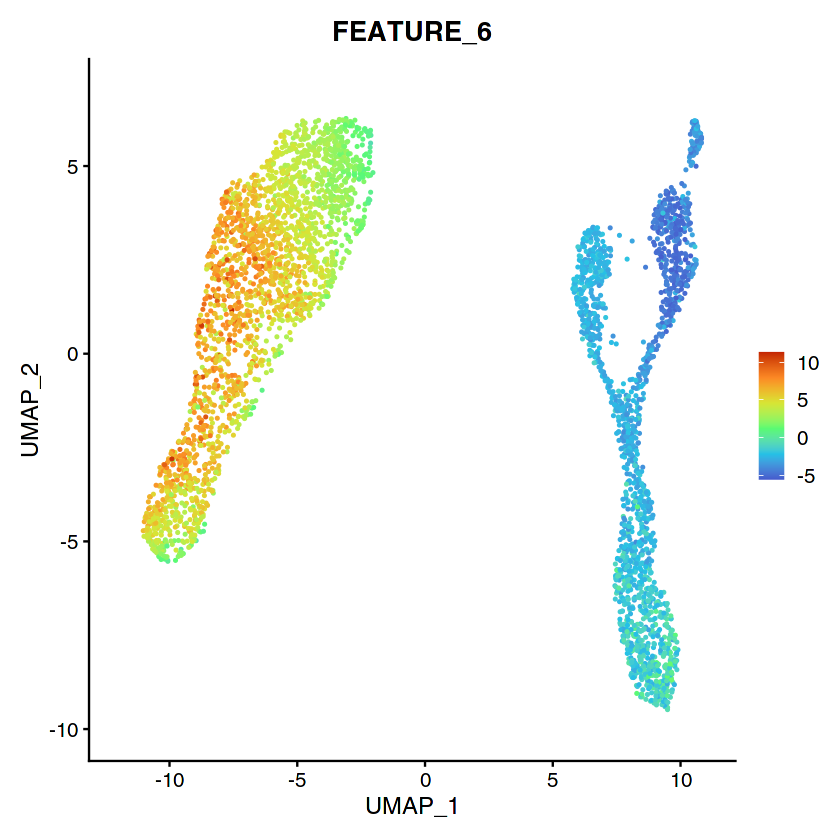

In [192]:
FeaturePlot(stem, "FEATURE_6") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

SPC11: Shows the hierarchy of explaining the branching in the somatic cells

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


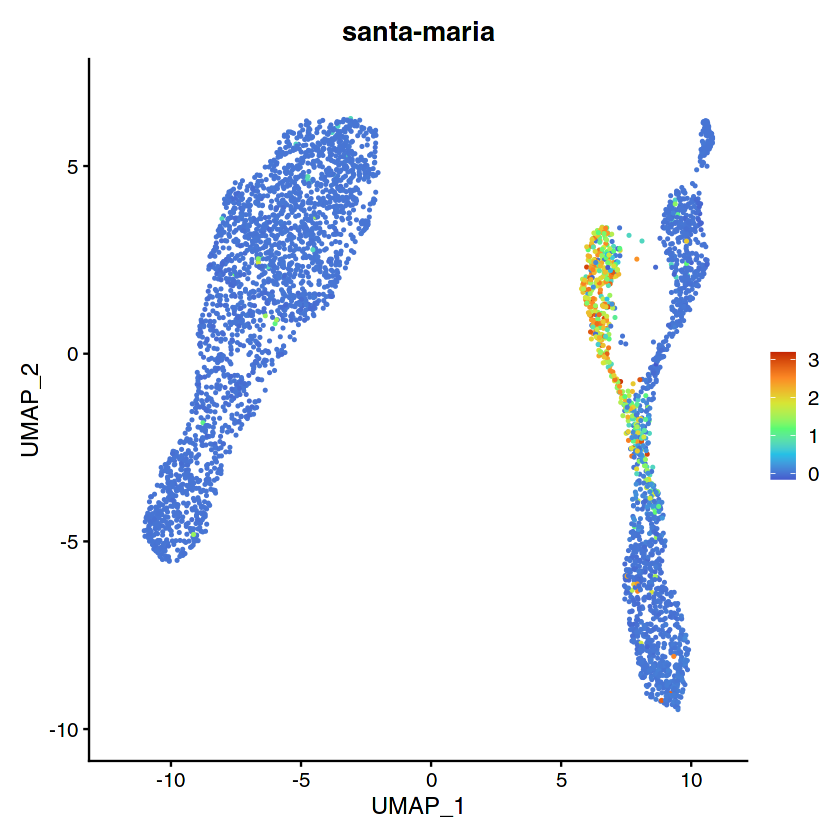

In [194]:
FeaturePlot(stem, "santa-maria") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)

In [92]:
cor(stem[["spca"]]@cell.embeddings, Idents(stem) == "cyst cell branch b")

FEATURE_1,0.48095939
FEATURE_2,-0.05530117
FEATURE_3,-0.12521017
FEATURE_4,0.13854450
FEATURE_5,0.49032023
FEATURE_6,-0.23477729
FEATURE_7,-0.10640175
FEATURE_8,0.14669965
FEATURE_9,0.31989108
FEATURE_10,0.19861765
FEATURE_11,0.51825996


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


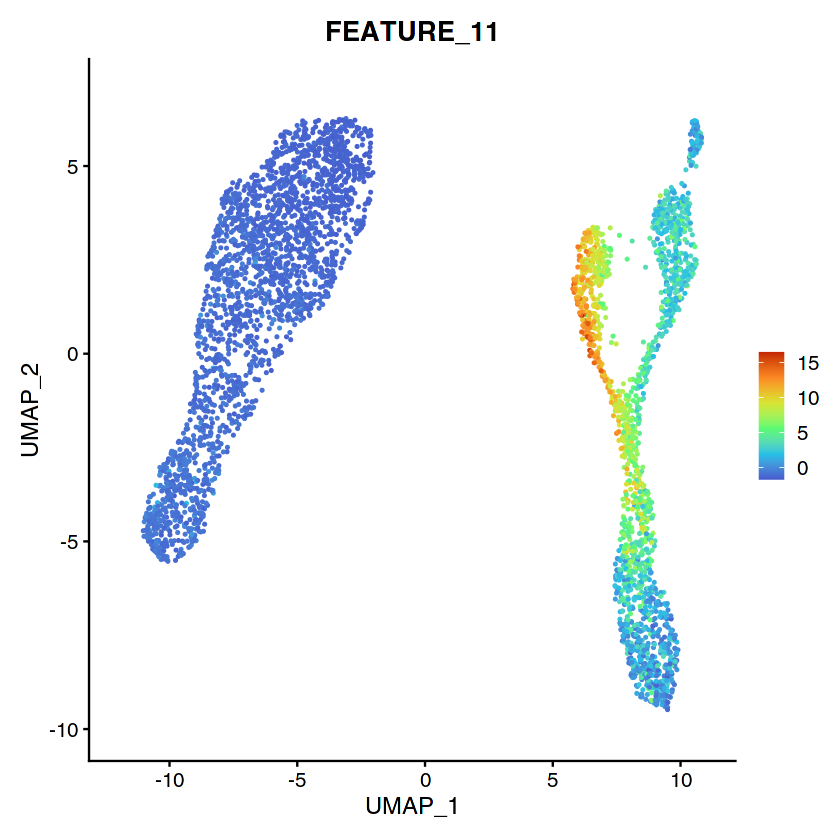

In [195]:
FeaturePlot(stem, "FEATURE_11") + scale_color_viridis_c(option = "turbo", begin = 0.1, end = 0.9)